In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as sk
from sklearn.model_selection import train_test_split

In [7]:
D = sk.load_digits()

In [9]:
X = D.data
y = D.target

In [15]:
#Organizar dados
idx = np.argsort(y)

y = y[idx]
X = X[idx, :]

In [22]:
X1, X2, y1, y2  = train_test_split(X, y, test_size=1/3)

print(X1.shape)
print(X2.shape)

print(np.sum(y1 == 0))
print(np.sum(y2 == 0))

(1198, 64)
(599, 64)
114
64


In [38]:
X1, X2, y1, y2  = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

N = X1.shape[0]
for i in range(10):
    print('%d: %.2f'%(i, np.sum(y1==i)/N*100))

print()
    
N = X2.shape[0]
for i in range(10):
    print('%d: %.2f'%(i, np.sum(y2==i)/N*100))

0: 9.93
1: 10.10
2: 9.85
3: 10.18
4: 10.10
5: 10.10
6: 10.10
7: 9.93
8: 9.68
9: 10.02

0: 9.85
1: 10.18
2: 9.85
3: 10.18
4: 10.02
5: 10.18
6: 10.02
7: 10.02
8: 9.68
9: 10.02


In [44]:
from sklearn.linear_model import LogisticRegression
#Isto é um classificador, não um Regressor, apesar de ter esse nome.
#Este serve para classificar.
#Está referenciado na documentação

In [49]:
dl = LogisticRegression(max_iter=10000)
dl.fit(X1, y1)

LogisticRegression(max_iter=10000)

In [58]:
#Score apenas devolve a estimativa
#Predict devolve para cada exemplo a estimativa. #Com essa informação podemos construir a matriz de confusão.

In [57]:
y2e = dl.predict(X2)
#NxD número exemplos

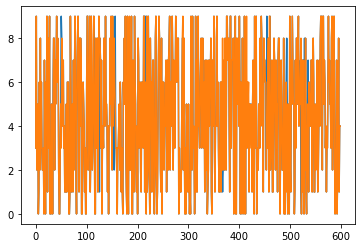

In [52]:
plt.plot(y2e)
plt.plot(y2)
plt.show()

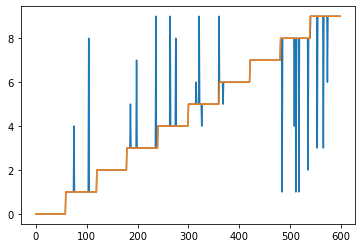

In [55]:
idx = np.argsort(y2)
y2 = y2[idx]
X2 = X2[idx, :]
y2e = dl.predict(X2)

plt.plot(y2e)
plt.plot(y2)
plt.show()

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y2, y2e)

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 59,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 58,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  1, 57,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 59,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  0],
       [ 0,  3,  1,  0,  1,  0,  0,  0, 53,  0],
       [ 0,  0,  0,  2,  0,  0,  1,  0,  1, 56]], dtype=int64)

In [62]:
dl.score(X2, y2) #Probabilidade total de Acerto

0.9649415692821369

In [64]:
np.sum(y2==y2e)/y2.shape[0] #Probabilidade total de Acerto -> Mesma coisa que o dl.score

0.9649415692821369